# Heart Attack Prediction


#The goal is to develop a predictive model that can determine whether a patient is at risk of having a heart attack.

age: Age of the patient

sex: Sex of the patient

cp: Chest pain type,
0 = Typical Angina - related to decrease blood flow to heart
1 = Atypical Angina - not typically related to heart problems
2 = Non-anginal Pain - Chest pain caused due to heart issues
3 = Asymptomatic - No chest pain present

trestbps: Resting blood pressure (in mm Hg)
Normal - less than 120mmHg
At Risk - between 120 - 139 mmHg
High BP - 140 mmHg

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = heart muscle injury , 2 = Enlargement of left ventricle of heart

thalach: Maximum heart rate achieved

oldpeak: Previous peak(measured on ECG and indicate presence of coronary artery disease)

slp: Slope , 0-better prognosis(+VE) , 1-moderate prognosis , 2-indicate high risk(-VE)

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable
1-patient is at high risk of getting heart attack
0-low risk of heart attack



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/hearthope.csv')

In [ ]:
df1.shape


(1025, 14)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Data Preprocessing

In [ ]:
# checking the null values of in data set
df1.isnull().sum().sum()

0

In [ ]:
# checking for duplicated values
df1.duplicated().sum()

723

Removing Duplicates and using Data Augmentation to retain the size of dataset

In [ ]:

# Assuming 'df' is your original DataFrame with shape (1025, 14)
# Drop duplicate rows
df_no_duplicates = df1.drop_duplicates()

# Calculate the number of duplicates to add
num_duplicates_to_add = 1025 - df_no_duplicates.shape[0]

# Randomly select rows to add as duplicates
random_indices = np.random.choice(df_no_duplicates.index, size=num_duplicates_to_add, replace=True)
df_duplicates = df_no_duplicates.loc[random_indices]

# Concatenate the original DataFrame with the duplicate rows
df = pd.concat([df_no_duplicates, df_duplicates], ignore_index=True)

# The shape of the augmented dataset
print("Shape of Augmented Dataset:", df.shape)


Shape of Augmented Dataset: (1025, 14)


#Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame containing the dataset
scaler = MinMaxScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Display the scaled DataFrame
print(df)


           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0     0.479167    1   0  0.292453  0.196347    0        1  0.740458      0   
1     0.500000    1   0  0.433962  0.175799    1        0  0.641221      1   
2     0.854167    1   0  0.481132  0.109589    0        1  0.412214      1   
3     0.666667    1   0  0.509434  0.175799    0        1  0.687023      0   
4     0.687500    0   0  0.415094  0.383562    1        1  0.267176      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.291667    0   2  0.264151  0.198630    0        1  0.717557      0   
1021  0.770833    0   3  0.528302  0.228311    0        1  0.328244      0   
1022  0.604167    1   0  0.292453  0.397260    0        0  0.763359      0   
1023  0.583333    1   0  0.669811  0.372146    1        0  0.404580      0   
1024  0.333333    1   3  0.150943  0.315068    0        1  0.465649      0   

       oldpeak  slope  ca  thal  target  
0     0.161290      2

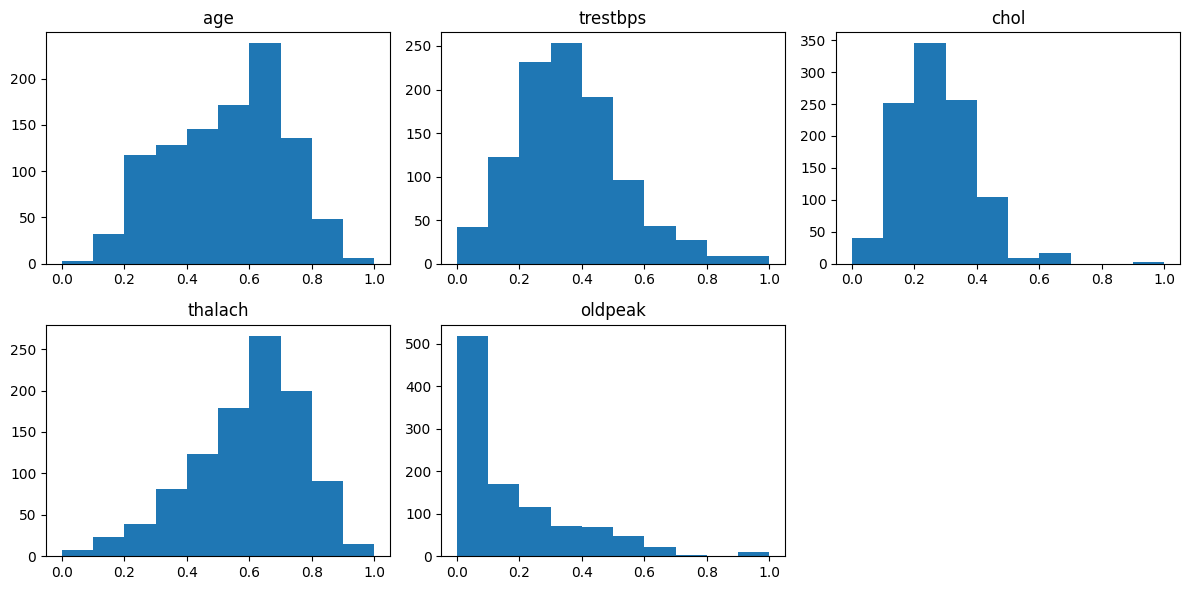

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of each scaled column
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']):
    plt.subplot(2, 3, i + 1)
    df[col].hist()
    plt.title(col)
    plt.grid(False)
plt.tight_layout()
plt.show()


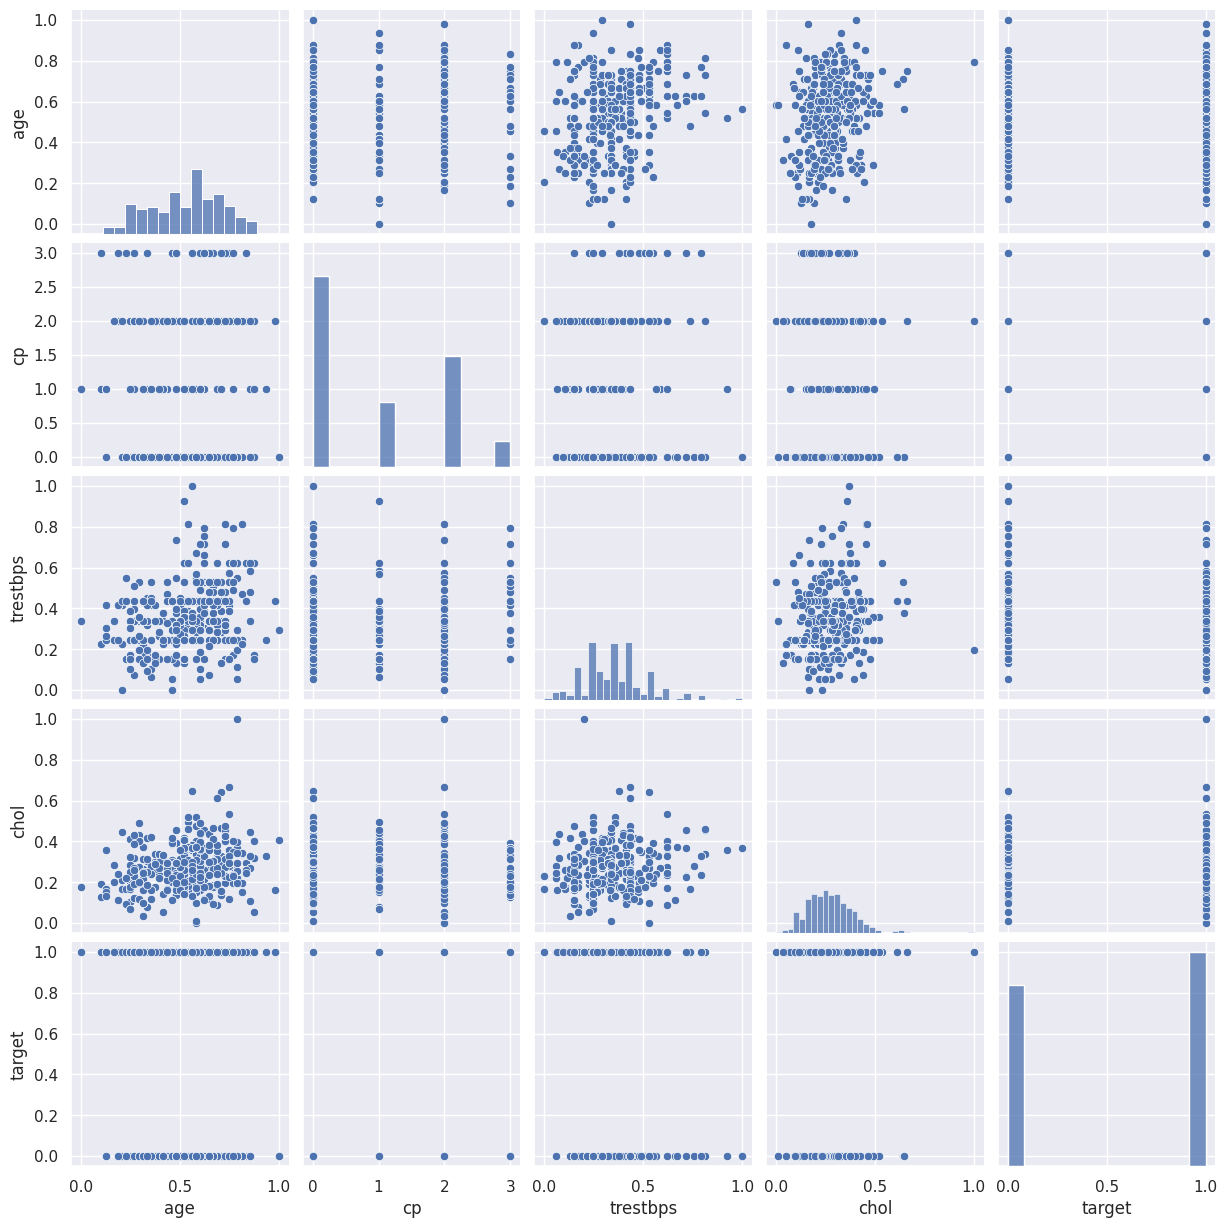

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)
sns.pairplot(df[["age", "cp", "trestbps", 'chol', 'target']])

#Correlation and Heat Map

In [ ]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.108624,-0.092672,0.270499,0.220430,0.107214,-0.123319,-0.368551,0.090488,0.188461,-0.111339,0.268698,0.118740,-0.225378
sex,-0.108624,1.000000,-0.063195,-0.056066,-0.212869,0.025527,0.015341,-0.066954,0.153903,0.078296,-0.018934,0.073493,0.217942,-0.288723
cp,-0.092672,-0.063195,1.000000,0.066143,-0.100860,0.078973,0.039701,0.291884,-0.381644,-0.172684,0.132300,-0.188188,-0.173907,0.424605
trestbps,0.270499,-0.056066,0.066143,1.000000,0.102057,0.188965,-0.185375,-0.017017,0.067915,0.217470,-0.148894,0.113745,0.104551,-0.160596
chol,0.220430,-0.212869,-0.100860,0.102057,1.000000,0.011531,-0.164752,-0.031219,0.052064,0.024120,0.002562,0.087683,0.127168,-0.099436
fbs,0.107214,0.025527,0.078973,0.188965,0.011531,1.000000,-0.122291,-0.027502,0.060410,-0.010037,-0.060671,0.150748,-0.045169,-0.034722
restecg,-0.123319,0.015341,0.039701,-0.185375,-0.164752,-0.122291,1.000000,0.024495,-0.061264,-0.082759,0.139039,-0.109109,-0.007873,0.148928
thalach,-0.368551,-0.066954,0.291884,-0.017017,-0.031219,-0.027502,0.024495,1.000000,-0.352241,-0.329316,0.368807,-0.177903,-0.110017,0.396946
exang,0.090488,0.153903,-0.381644,0.067915,0.052064,0.060410,-0.061264,-0.352241,1.000000,0.298751,-0.283983,0.094628,0.215687,-0.410708
oldpeak,0.188461,0.078296,-0.172684,0.217470,0.024120,-0.010037,-0.082759,-0.329316,0.298751,1.000000,-0.600137,0.242983,0.220512,-0.458170


<Axes: >

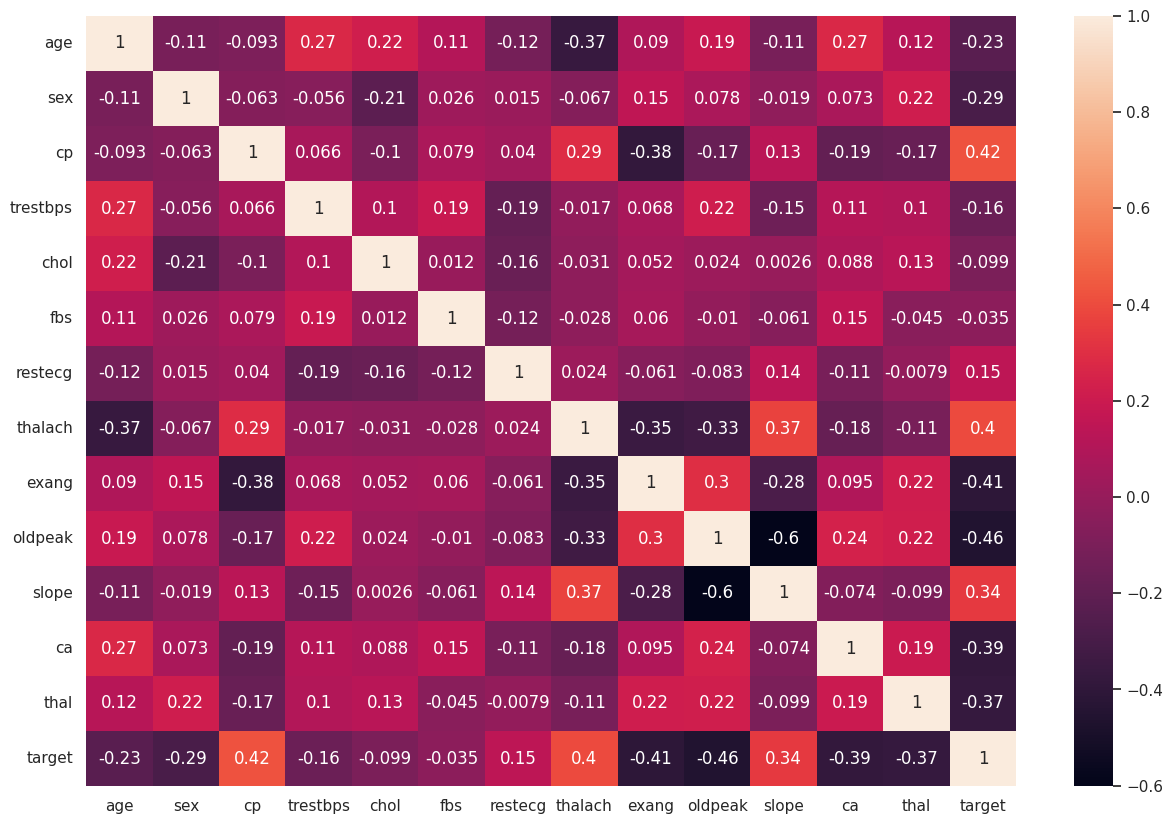

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            annot=True)

#Split Train-Test

Splitting Training and Testing data in ratio 70:30
Further test data is split into ratio 50:50

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame
X = df.drop('target', axis=1)
y = df['target']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,1,3,2,0


In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


#Feature Selection

SelectKBest

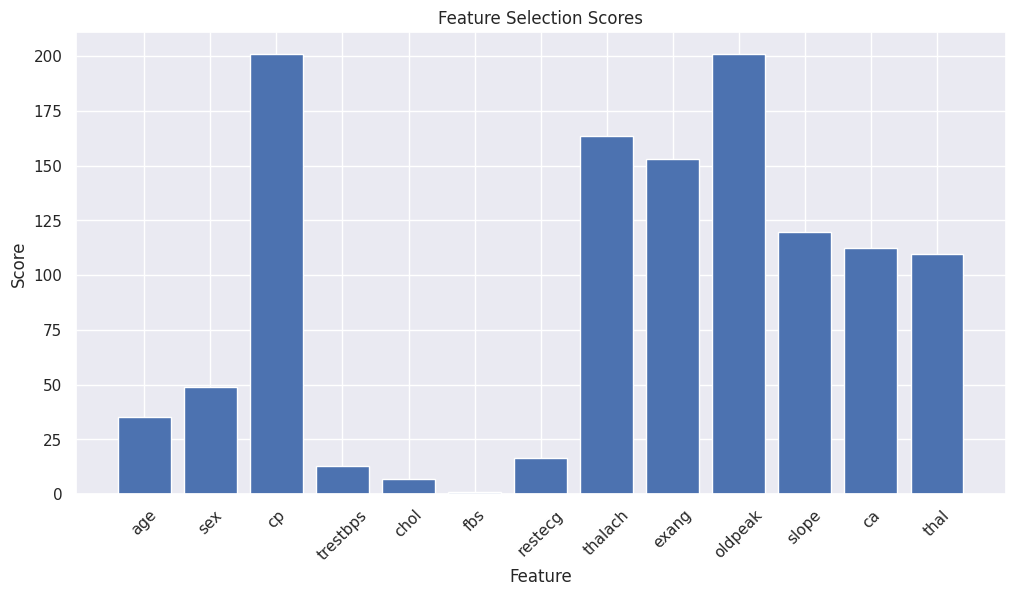


Top 5 Selected Features:
oldpeak
cp
thalach
exang
slope


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training features and target
selector = SelectKBest(score_func=f_classif, k='all')  # Select all features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the feature scores
scores = selector.scores_

# Get the feature names
feature_names = X_train.columns

# Plot the feature scores
plt.figure(figsize=(12, 6))
plt.bar(feature_names, scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Selection Scores')
plt.xticks(rotation=45)
plt.show()

# Get the indices of top 5 features
top5_indices = (-scores).argsort()[:5]

# Get the names of top 5 features
top5_features = feature_names[top5_indices]

# Print the names of top 5 features
print("\nTop 5 Selected Features:")
for feature in top5_features:
    print(feature)



#Model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are your preprocessed datasets
X_train_selected = X_train[['exang', 'cp', 'oldpeak', 'ca', 'thalach']]
X_val_selected = X_val[['exang', 'cp', 'oldpeak', 'ca', 'thalach']]
X_test_selected = X_test[['exang', 'cp', 'oldpeak', 'ca', 'thalach']]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_val_scaled)
lr_accuracy = accuracy_score(y_val, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, lr_preds))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_val_scaled)
rf_accuracy = accuracy_score(y_val, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_val, rf_preds))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
gb_preds = gb_model.predict(X_val_scaled)
gb_accuracy = accuracy_score(y_val, gb_preds)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, gb_preds))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_val_scaled)
svm_accuracy = accuracy_score(y_val, svm_preds)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_val, svm_preds))

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_preds = nb_model.predict(X_val_scaled)
nb_accuracy = accuracy_score(y_val, nb_preds)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_val, nb_preds))


# Simple Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_preds = nn_model.predict(X_val_scaled)
nn_accuracy = accuracy_score(y_val, nn_preds)
print("Simple Neural Network Accuracy:", nn_accuracy)
print("Simple Neural Network Classification Report:")
print(classification_report(y_val, nn_preds))

from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_val_scaled)
knn_accuracy = accuracy_score(y_val, knn_preds)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_val, knn_preds))


Logistic Regression Accuracy: 0.7857142857142857
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        65
           1       0.81      0.82      0.82        89

    accuracy                           0.79       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.79      0.79      0.79       154

Random Forest Accuracy: 0.987012987012987
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.98      1.00      0.99        89

    accuracy                           0.99       154
   macro avg       0.99      0.98      0.99       154
weighted avg       0.99      0.99      0.99       154

Gradient Boosting Accuracy: 0.9025974025974026
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#Model Testing

In [ ]:
# Testing set
X_test_selected = X_test[['exang', 'cp', 'oldpeak', 'ca', 'thalach']]
X_test_scaled = scaler.transform(X_test_selected)
# Logistic Regression
lr_model.fit(X_train_scaled, y_train)  # Fit the model
lr_test_preds = lr_model.predict(X_test_scaled)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)
print("Logistic Regression Testing Classification Report:")
print(classification_report(y_test, lr_test_preds))


# Random Forest
rf_test_preds = rf_model.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
print("Random Forest Testing Accuracy:", rf_test_accuracy)
print("Random Forest Testing Classification Report:")
print(classification_report(y_test, rf_test_preds))

# Gradient Boosting
lr_model.fit(X_train_scaled, y_train)
gb_test_preds = gb_model.predict(X_test_scaled)
gb_test_accuracy = accuracy_score(y_test, gb_test_preds)
print("Gradient Boosting Testing Accuracy:", gb_test_accuracy)
print("Gradient Boosting Testing Classification Report:")
print(classification_report(y_test, gb_test_preds))

# Support Vector Machine
svm_test_preds = svm_model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
print("Support Vector Machine Testing Accuracy:", svm_test_accuracy)
print("Support Vector Machine Testing Classification Report:")
print(classification_report(y_test, svm_test_preds))

# Naive Bayes
nb_test_preds = nb_model.predict(X_test_scaled)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)
print("Naive Bayes Testing Accuracy:", nb_test_accuracy)
print("Naive Bayes Testing Classification Report:")
print(classification_report(y_test, nb_test_preds))

# Simple Neural Network
nn_test_preds = nn_model.predict(X_test_scaled)
nn_test_accuracy = accuracy_score(y_test, nn_test_preds)
print("Simple Neural Network Testing Accuracy:", nn_test_accuracy)
print("Simple Neural Network Testing Classification Report:")
print(classification_report(y_test, nn_test_preds))

# K-Nearest Neighbors
knn_test_preds = knn_model.predict(X_test_scaled)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
print("K-Nearest Neighbors Testing Accuracy:", knn_test_accuracy)
print("K-Nearest Neighbors Testing Classification Report:")
print(classification_report(y_test, knn_test_preds))


Logistic Regression Testing Accuracy: 0.8181818181818182
Logistic Regression Testing Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        72
           1       0.79      0.90      0.84        82

    accuracy                           0.82       154
   macro avg       0.83      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154

Random Forest Testing Accuracy: 0.9805194805194806
Random Forest Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.96      1.00      0.98        82

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154

Gradient Boosting Testing Accuracy: 0.8961038961038961
Gradient Boosting Testing Classification Report:
              precision    recall  f1-

Graph to compare the accuracies

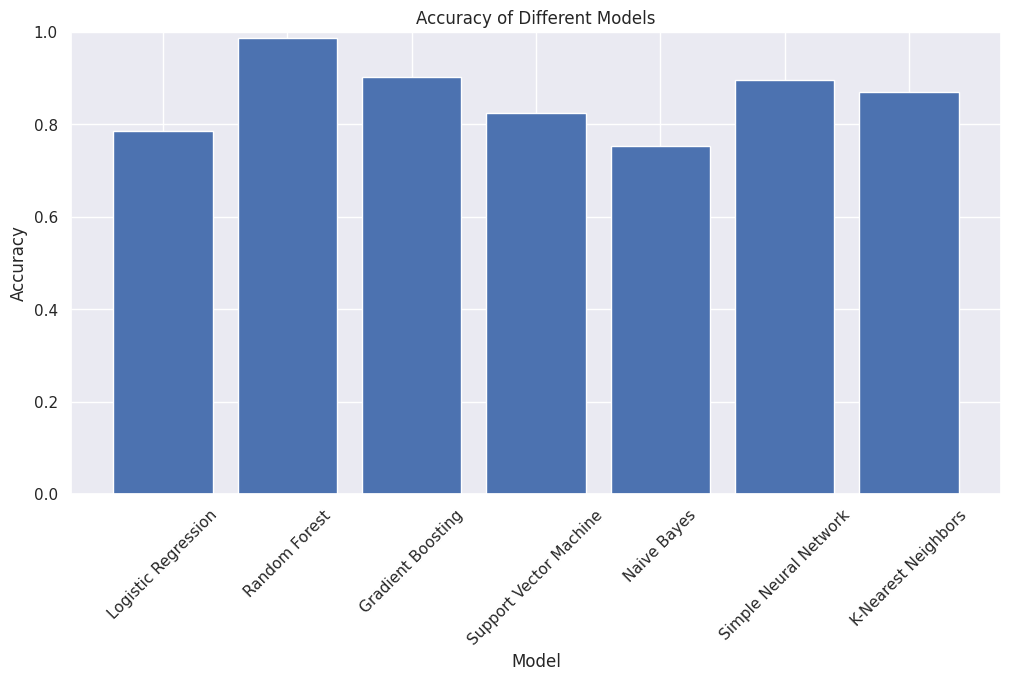

In [ ]:
import matplotlib.pyplot as plt

# List to store accuracies
accuracies = []

# Logistic Regression
accuracies.append(lr_accuracy)

# Random Forest
accuracies.append(rf_accuracy)

# Gradient Boosting
accuracies.append(gb_accuracy)

# Support Vector Machine
accuracies.append(svm_accuracy)

# Naive Bayes
accuracies.append(nb_accuracy)


# Simple Neural Network
accuracies.append(nn_accuracy)

# K-Nearest Neighbors
accuracies.append(knn_accuracy)

# List of model names
models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "Support Vector Machine",
          "Naive Bayes",  "Simple Neural Network", "K-Nearest Neighbors"]

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim([0.0, 1.0])
plt.show()


#Hybrid Models

1.Voting Classifier

In [ ]:

from sklearn.ensemble import VotingClassifier

# Define the base models
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(estimators=[('lr', lr_model), ('gb', gb_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)
# Predict on the training data
train_preds = voting_clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_preds)

# Evaluate the voting classifier
voting_preds = voting_clf.predict(X_val_scaled)
voting_accuracy = accuracy_score(y_val, voting_preds)

print("Voting Classifier Training Accuracy:", train_accuracy)
print("Voting Classifier Validation Accuracy:", voting_accuracy)
print("Voting Classifier Classification Report:")
print(classification_report(y_val, voting_preds))
import joblib

# Assuming X_test_scaled and y_test are your preprocessed test dataset

# Predict on the test data
test_preds = voting_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_preds)

print("Voting Classifier Test Accuracy:", test_accuracy)
print("Voting Classifier Classification Report:")
print(classification_report(y_test, test_preds))



Voting Classifier Training Accuracy: 0.891213389121339
Voting Classifier Validation Accuracy: 0.8441558441558441
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        65
           1       0.86      0.88      0.87        89

    accuracy                           0.84       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.84      0.84      0.84       154

Voting Classifier Test Accuracy: 0.8766233766233766
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        72
           1       0.85      0.93      0.89        82

    accuracy                           0.88       154
   macro avg       0.88      0.87      0.88       154
weighted avg       0.88      0.88      0.88       154



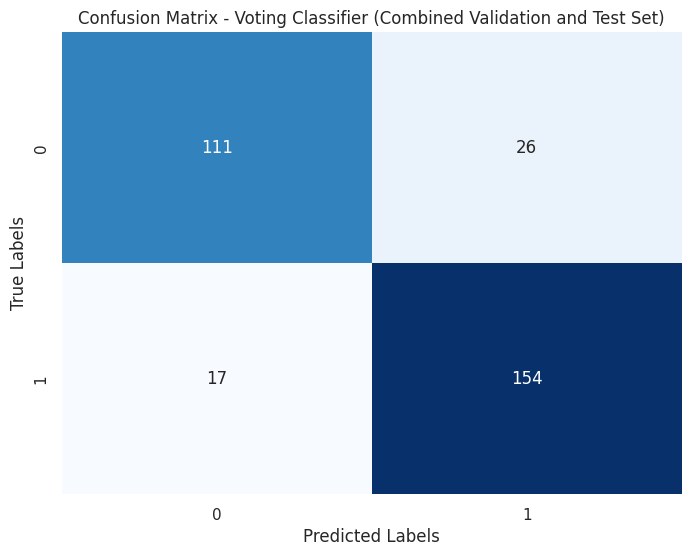

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine predictions and true labels for validation and test sets
all_preds = np.concatenate((voting_preds, test_preds))
all_true = np.concatenate((y_val, y_test))

# Compute confusion matrix for combined data
cm_all = confusion_matrix(all_true, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Voting Classifier (Combined Validation and Test Set)')
plt.show()


2.Stacking Classifier

In [ ]:
import pickle
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Define the base models
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC())
]

# Assuming X_train, X_val, y_train, y_val are your original datasets
# Select the same subset of features for both training and validation sets
selected_features = ['exang', 'cp', 'oldpeak', 'ca', 'thalach']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)

# Continue with your stacking classifier code...

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the stacking classifier
stacking_preds = stacking_clf.predict(X_val_scaled)
stacking_accuracy = accuracy_score(y_val, stacking_preds)
print("Stacking Classifier Accuracy:", stacking_accuracy)
print("Stacking Classifier Classification Report:")
print(classification_report(y_val, stacking_preds))

# Assuming X_test, y_test are your preprocessed test datasets

# Select the top 5 features for the test dataset
X_test_selected = X_test[['exang', 'cp', 'oldpeak', 'ca', 'thalach']]

# Standardize the features for the test dataset
X_test_scaled = scaler.transform(X_test_selected)

# Predict on the test data
test_preds = stacking_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_preds)

print("Stacking Classifier Test Accuracy:", test_accuracy)
print("Stacking Classifier Test Classification Report:")
print(classification_report(y_test, test_preds))



Stacking Classifier Accuracy: 0.987012987012987
Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.98      1.00      0.99        89

    accuracy                           0.99       154
   macro avg       0.99      0.98      0.99       154
weighted avg       0.99      0.99      0.99       154

Stacking Classifier Test Accuracy: 0.974025974025974
Stacking Classifier Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       0.95      1.00      0.98        82

    accuracy                           0.97       154
   macro avg       0.98      0.97      0.97       154
weighted avg       0.98      0.97      0.97       154



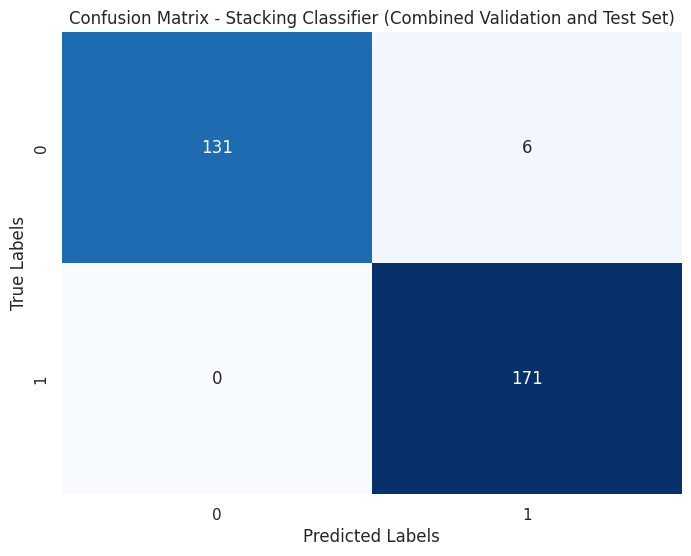

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine predictions and true labels for validation and test sets
all_preds = np.concatenate((stacking_preds, test_preds))
all_true = np.concatenate((y_val, y_test))

# Compute confusion matrix for combined data
cm_all = confusion_matrix(all_true, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Stacking Classifier (Combined Validation and Test Set)')
plt.show()


**Cross Validation for Stacking Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Define the base models
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC())
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform cross-validation
cv_scores = cross_val_score(stacking_clf, X_scaled, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())



Cross-Validation Scores: [0.98536585 0.9804878  1.         1.         1.        ]
Mean Accuracy: 0.9931707317073171
Standard Deviation of Accuracy: 0.008505168670323273


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, stacking_preds)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[63  2]
 [ 0 89]]


ROC Curve For Stacking Classifier

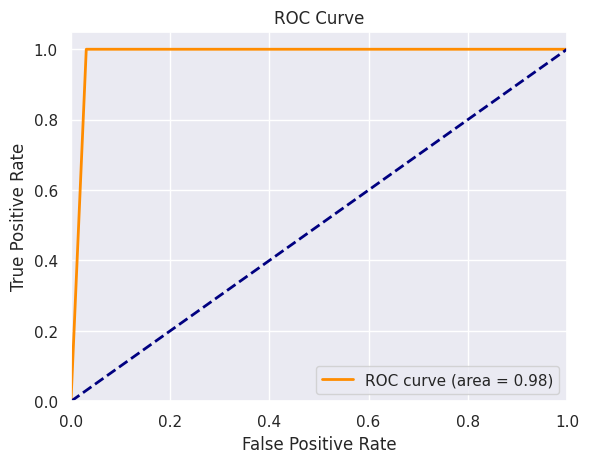

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, stacking_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Performance metrics of Stacking Classifier

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, stacking_preds)
recall = recall_score(y_val, stacking_preds)
f1 = f1_score(y_val, stacking_preds)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.978021978021978
Recall: 1.0
F1-score: 0.9888888888888888


In [ ]:
import joblib

# Assuming you have trained stacking_clf and selector in your script
joblib.dump(stacking_clf, 'stacking_classifier.pkl')
joblib.dump(selector, 'feature_selection_model.pkl')

['feature_selection_model.pkl']

#Graph to compare Overall accuracies of all models

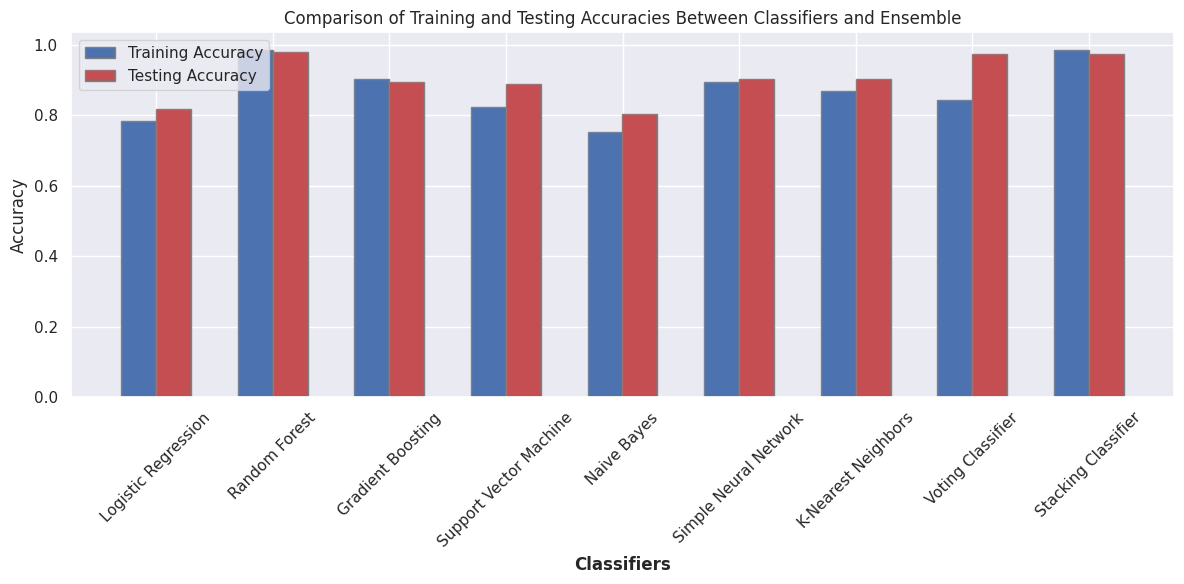

In [ ]:
import matplotlib.pyplot as plt

# Define classifiers and their names
classifiers = [
    ('Logistic Regression', lr_accuracy, lr_test_accuracy),
    ('Random Forest', rf_accuracy, rf_test_accuracy),
    ('Gradient Boosting', gb_accuracy, gb_test_accuracy),
    ('Support Vector Machine', svm_accuracy, svm_test_accuracy),
    ('Naive Bayes', nb_accuracy, nb_test_accuracy),
    ('Simple Neural Network', nn_accuracy, nn_test_accuracy),
    ('K-Nearest Neighbors', knn_accuracy, knn_test_accuracy),
    ('Voting Classifier', voting_accuracy, test_accuracy),
    ('Stacking Classifier', stacking_accuracy, test_accuracy)
]

# Extract names and accuracies for plotting
names, train_accuracies, test_accuracies = zip(*classifiers)

# Plotting
plt.figure(figsize=(12, 6))
barWidth = 0.3

# Set position of bar on X axis
r1 = range(len(train_accuracies))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, train_accuracies, color='b', width=barWidth, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, test_accuracies, color='r', width=barWidth, edgecolor='grey', label='Testing Accuracy')

# Add xticks on the middle of the group bars
plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(train_accuracies))], names, rotation=45)

# Add ylabel and legend
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies Between Classifiers and Ensemble')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
